In [ ]:
pip install xgboost

In [ ]:
pip install graphviz

In [1]:
#import modules and necessary dependencies
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
#read the csv file
df = pd.read_csv(os.path.join("Resources/AB_NYC_2019.csv"))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Check the size of the dataset
df.shape

(48895, 16)

In [4]:
#Check data type
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
#analyze the test variable
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

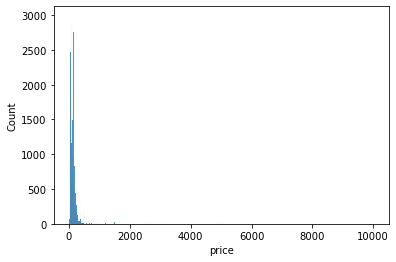

In [6]:
#check the range of the price
p1=sns.histplot(df["price"])

In [7]:
#check the size of prices above 1000
df.loc[df["price"]>1000].shape

(239, 16)

In [8]:
#drop the rows with price above 1000
df=df[~(df["price"]>1000)]

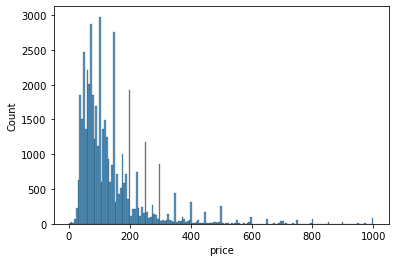

In [9]:
#check for normal distribution
p2=sns.histplot(df["price"])

In [10]:
#drop the rows with price above 1000
df=df[~(df["price"]>250)]

In [11]:
#final size of the dataset
df.shape

(43687, 16)

In [12]:
#get the summary statistics
df["price"].describe()

count    43687.000000
mean       111.209032
std         57.331859
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        250.000000
Name: price, dtype: float64

In [13]:
#drop the columns that is not relevant
df.drop(["id", "name", "host_name","host_id","latitude", "longitude","neighbourhood","last_review"], axis=1, inplace=True)

In [14]:
#check for any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43687 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             43687 non-null  object 
 1   room_type                       43687 non-null  object 
 2   price                           43687 non-null  int64  
 3   minimum_nights                  43687 non-null  int64  
 4   number_of_reviews               43687 non-null  int64  
 5   reviews_per_month               35312 non-null  float64
 6   calculated_host_listings_count  43687 non-null  int64  
 7   availability_365                43687 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.0+ MB


In [15]:
#fill in the missing values with appropriate data type

df.fillna({"reviews_per_month":0}, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43687 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             43687 non-null  object 
 1   room_type                       43687 non-null  object 
 2   price                           43687 non-null  int64  
 3   minimum_nights                  43687 non-null  int64  
 4   number_of_reviews               43687 non-null  int64  
 5   reviews_per_month               43687 non-null  float64
 6   calculated_host_listings_count  43687 non-null  int64  
 7   availability_365                43687 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.0+ MB


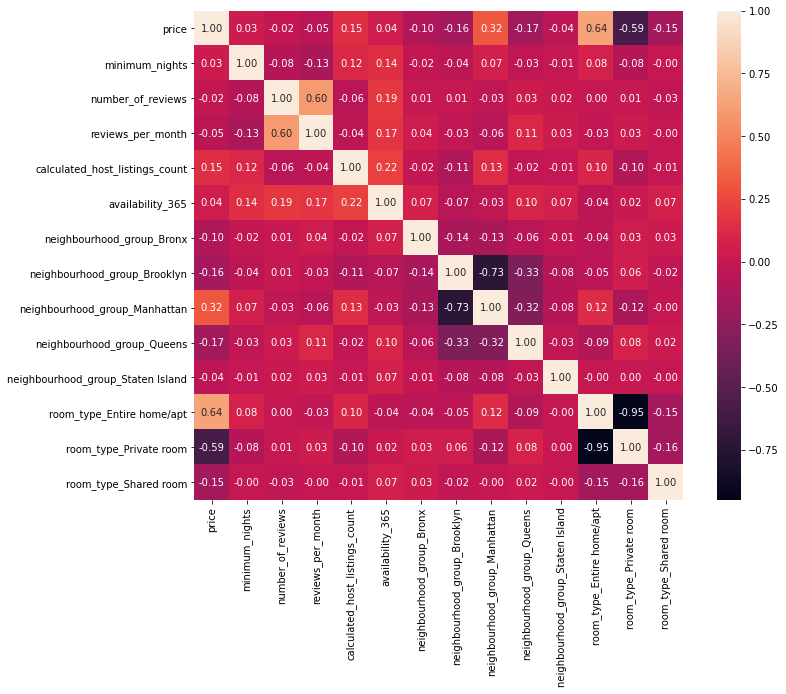

In [17]:
#correlation between the target and the features
df2=pd.get_dummies(df)

corr = df2.corr()
f, ax = plt.subplots(figsize=(12,9))
,
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=corr.columns, xticklabels=corr.columns)
plt.show()

In [18]:
#get the features and the target
X=df[["reviews_per_month","neighbourhood_group","room_type","availability_365"]]

In [19]:
#convert strings into numbers and assign price as the target
X= pd.get_dummies(X)
y=df["price"]

In [38]:
#check the size 
print(X.shape)
print(y.shape)

(43687, 10)
(43687,)


In [39]:
#split the dataset into  80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

<AxesSubplot:ylabel='Count'>

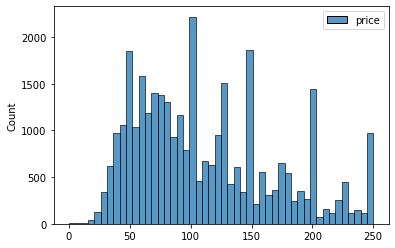

In [40]:
sns.histplot(pd.DataFrame(y_train))

<AxesSubplot:ylabel='Count'>

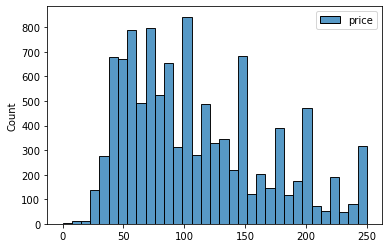

In [41]:
sns.histplot(pd.DataFrame(y_test))

In [42]:
#build dmatrices form the datasets
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [43]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE

rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print("Baseline RMSE: %f" % (rmse))

Baseline RMSE: 57.240314


In [44]:
#set the paramaters with default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight':1,
    'eta':.1,
    'subsample': 0.1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror'    
}

In [45]:
#add the evaluation metric root mean squared error
params['eval_metric'] = "rmse"

In [46]:
#set the max boosting rounds
num_boost_round = 100

In [47]:
#pass more parameters on top of the default parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:112.91773
[1]	Test-rmse:103.18291
[2]	Test-rmse:94.58810
[3]	Test-rmse:87.01001
[4]	Test-rmse:80.31055
[5]	Test-rmse:74.40402
[6]	Test-rmse:69.24835
[7]	Test-rmse:64.85741
[8]	Test-rmse:60.97772
[9]	Test-rmse:57.60058
[10]	Test-rmse:54.75179
[11]	Test-rmse:52.30317
[12]	Test-rmse:50.26772
[13]	Test-rmse:48.50156
[14]	Test-rmse:47.03014
[15]	Test-rmse:45.82133
[16]	Test-rmse:44.85965
[17]	Test-rmse:44.12112
[18]	Test-rmse:43.49801
[19]	Test-rmse:42.95589
[20]	Test-rmse:42.51474
[21]	Test-rmse:42.08004
[22]	Test-rmse:41.76212
[23]	Test-rmse:41.49608
[24]	Test-rmse:41.29223
[25]	Test-rmse:41.12477
[26]	Test-rmse:40.98409
[27]	Test-rmse:40.89716
[28]	Test-rmse:40.79871
[29]	Test-rmse:40.74050
[30]	Test-rmse:40.67063
[31]	Test-rmse:40.64066
[32]	Test-rmse:40.60834
[33]	Test-rmse:40.57383
[34]	Test-rmse:40.55176
[35]	Test-rmse:40.53639
[36]	Test-rmse:40.52537
[37]	Test-rmse:40.51077
[38]	Test-rmse:40.51046
[39]	Test-rmse:40.51326
[40]	Test-rmse:40.52545
[41]	Test-rmse:40.51405


In [48]:
# get the best RMSE
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 40.48 with 47 rounds


In [31]:
#run cross validation on the training data to get the rmse score
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'rmse'},
    early_stopping_rounds=10
)

cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,113.941048,0.126640,113.945610,0.246249
1,104.205834,0.125782,104.207456,0.259138
2,95.533722,0.075538,95.545219,0.303252
3,87.917275,0.171472,87.945325,0.299931
4,81.168836,0.089403,81.216169,0.336260
5,75.297668,0.129760,75.370150,0.290210
6,70.153053,0.106293,70.249601,0.320589
7,65.658551,0.166392,65.771367,0.269315
8,61.747894,0.150512,61.887368,0.305159
9,58.403484,0.169580,58.580638,0.324941


In [49]:
#get the min rmse score
cv_results['test-rmse-mean'].min()

41.36557133333333

In [50]:
#set the range of max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(2,15)
    for min_child_weight in range(2,15)
]

In [51]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {},RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=2
	RMSE 41.224828333333335 for 99 rounds
CV with max_depth=2, min_child_weight=3
	RMSE 41.22933066666667 for 99 rounds
CV with max_depth=2, min_child_weight=4
	RMSE 41.226074000000004 for 99 rounds
CV with max_depth=2, min_child_weight=5
	RMSE 41.22856633333333 for 82 rounds
CV with max_depth=2, min_child_weight=6
	RMSE 41.23489133333333 for 82 rounds
CV with max_depth=2, min_child_weight=7
	RMSE 41.22261566666666 for 98 rounds
CV with max_depth=2, min_child_weight=8
	RMSE 41.22870133333333 for 82 rounds
CV with max_depth=2, min_child_weight=9
	RMSE 41.22855633333333 for 94 rounds
CV with max_depth=2, min_child_weight=10
	RMSE 41.22168466666667 for 94 rounds
CV with max_depth=2, min_child_weight=11
	RMSE 41.220024 for 91 rounds
CV with max_depth=2, min_child_weight=12
	RMSE 41.22279733333333 for 89 rounds
CV with max_depth=2, min_child_weight=13
	RMSE 41.224334999999996 for 98 rounds
CV with max_depth=2, min_child_weight=14
	RMSE 41.22212966666667 

	RMSE 41.725212 for 37 rounds
CV with max_depth=10, min_child_weight=6
	RMSE 41.66486866666667 for 36 rounds
CV with max_depth=10, min_child_weight=7
	RMSE 41.625502000000004 for 37 rounds
CV with max_depth=10, min_child_weight=8
	RMSE 41.553234 for 38 rounds
CV with max_depth=10, min_child_weight=9
	RMSE 41.532447999999995 for 37 rounds
CV with max_depth=10, min_child_weight=10
	RMSE 41.525531666666666 for 37 rounds
CV with max_depth=10, min_child_weight=11
	RMSE 41.47486766666666 for 37 rounds
CV with max_depth=10, min_child_weight=12
	RMSE 41.44186800000001 for 36 rounds
CV with max_depth=10, min_child_weight=13
	RMSE 41.41540166666667 for 40 rounds
CV with max_depth=10, min_child_weight=14
	RMSE 41.41785333333333 for 46 rounds
CV with max_depth=11, min_child_weight=2
	RMSE 42.01285033333333 for 37 rounds
CV with max_depth=11, min_child_weight=3
	RMSE 41.89744066666666 for 36 rounds
CV with max_depth=11, min_child_weight=4
	RMSE 41.839273999999996 for 38 rounds
CV with max_depth=11,

In [52]:
#update the params
params['max_depth'] = 4
params['min_child_weight'] =10

In [58]:
#set the range for subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(1,10)]
    for colsample in [i/10. for i in range(1,10)]
]

In [59]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.9, colsample=0.9
	RMSE 41.03843966666667 for 83 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 41.04968766666667 for 87 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 41.056749 for 87 rounds
CV with subsample=0.9, colsample=0.6
	RMSE 41.06824866666667 for 95 rounds
CV with subsample=0.9, colsample=0.5
	RMSE 41.07906833333334 for 99 rounds
CV with subsample=0.9, colsample=0.4
	RMSE 41.098875666666665 for 99 rounds
CV with subsample=0.9, colsample=0.3
	RMSE 41.156210666666674 for 99 rounds
CV with subsample=0.9, colsample=0.2
	RMSE 41.29998033333333 for 99 rounds
CV with subsample=0.9, colsample=0.1
	RMSE 42.188217 for 99 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 41.02766166666667 for 75 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 41.034041333333334 for 79 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 41.052580666666664 for 87 rounds
CV with subsample=0.8, colsample=0.6
	RMSE 41.06072633333333 for 91 rounds
CV with subsample=0.8, colsample=0.5


In [60]:
#update the params
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9

In [61]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .02, .03]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3
	RMSE 41.079024000000004 for 24 rounds
CV with eta=0.2
	RMSE 41.086208 for 33 rounds
CV with eta=0.1
	RMSE 41.02766166666667 for 75 rounds
CV with eta=0.05
	RMSE 41.091215999999996 for 99 rounds
CV with eta=0.01
	RMSE 59.84946299999999 for 99 rounds
CV with eta=0.02
	RMSE 44.15929566666666 for 99 rounds
CV with eta=0.03
	RMSE 41.564811999999996 for 99 rounds
Best params: 0.1, RMSE: 41.02766166666667
Wall time: 19.8 s


In [63]:
#update the params
params["eta"] = 0.1

In [64]:
#check the params
params

{'max_depth': 4,
 'min_child_weight': 10,
 'eta': 0.1,
 'subsample': 0.8,
 'colsample_bytree': 0.9,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [65]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:112.85892
[1]	Test-rmse:103.11093
[2]	Test-rmse:94.46691
[3]	Test-rmse:86.87593
[4]	Test-rmse:80.19037
[5]	Test-rmse:74.30361
[6]	Test-rmse:69.17808
[7]	Test-rmse:64.72030
[8]	Test-rmse:60.86711
[9]	Test-rmse:57.56965
[10]	Test-rmse:54.73562
[11]	Test-rmse:52.36700
[12]	Test-rmse:50.32706
[13]	Test-rmse:48.62685
[14]	Test-rmse:47.19284
[15]	Test-rmse:46.02365
[16]	Test-rmse:45.04219
[17]	Test-rmse:44.21636
[18]	Test-rmse:43.53568
[19]	Test-rmse:42.97332
[20]	Test-rmse:42.51296
[21]	Test-rmse:42.14659
[22]	Test-rmse:41.84081
[23]	Test-rmse:41.58230
[24]	Test-rmse:41.38118
[25]	Test-rmse:41.21146
[26]	Test-rmse:41.06899
[27]	Test-rmse:40.94979
[28]	Test-rmse:40.85510
[29]	Test-rmse:40.77177
[30]	Test-rmse:40.70957
[31]	Test-rmse:40.65721
[32]	Test-rmse:40.61198
[33]	Test-rmse:40.57515
[34]	Test-rmse:40.54306
[35]	Test-rmse:40.51272
[36]	Test-rmse:40.49428
[37]	Test-rmse:40.47624
[38]	Test-rmse:40.45741
[39]	Test-rmse:40.44114
[40]	Test-rmse:40.43047
[41]	Test-rmse:40.42086


In [66]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 40.30 in 100 rounds


In [67]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:112.85892
[1]	Test-rmse:103.11093
[2]	Test-rmse:94.46691
[3]	Test-rmse:86.87593
[4]	Test-rmse:80.19037
[5]	Test-rmse:74.30361
[6]	Test-rmse:69.17808
[7]	Test-rmse:64.72030
[8]	Test-rmse:60.86711
[9]	Test-rmse:57.56965
[10]	Test-rmse:54.73562
[11]	Test-rmse:52.36700
[12]	Test-rmse:50.32706
[13]	Test-rmse:48.62685
[14]	Test-rmse:47.19284
[15]	Test-rmse:46.02365
[16]	Test-rmse:45.04219
[17]	Test-rmse:44.21636
[18]	Test-rmse:43.53568
[19]	Test-rmse:42.97332
[20]	Test-rmse:42.51296
[21]	Test-rmse:42.14659
[22]	Test-rmse:41.84081
[23]	Test-rmse:41.58230
[24]	Test-rmse:41.38118
[25]	Test-rmse:41.21146
[26]	Test-rmse:41.06899
[27]	Test-rmse:40.94979
[28]	Test-rmse:40.85510
[29]	Test-rmse:40.77177
[30]	Test-rmse:40.70957
[31]	Test-rmse:40.65721
[32]	Test-rmse:40.61198
[33]	Test-rmse:40.57515
[34]	Test-rmse:40.54306
[35]	Test-rmse:40.51272
[36]	Test-rmse:40.49428
[37]	Test-rmse:40.47624
[38]	Test-rmse:40.45741
[39]	Test-rmse:40.44114
[40]	Test-rmse:40.43047
[41]	Test-rmse:40.42086


In [68]:
np.sqrt(mean_squared_error(best_model.predict(dtest), y_test))

40.295248065073075

In [69]:
best_model.save_model("my_model.model")

In [88]:
import joblib
file = "xgbmodel.h5"
joblib.dump("my_model.model", file)

['xgbmodel.h5']

In [78]:
best_model.save_model("XGBoost_model.h5")

In [79]:
loaded_model = xgb.Booster()
loaded_model.load_model("XGBoost_model.h5")

y_test_pred =loaded_model.predict(dtest)
print(f'true = {np.array(y_test)[:5]}')
print(f'pred = {y_test_pred[:5]}')


true = [130  95 120 125 190]
pred = [ 89.70972   78.06408   96.122955  66.714264 164.38577 ]


In [80]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_test_pred))

0.5042321136545949


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

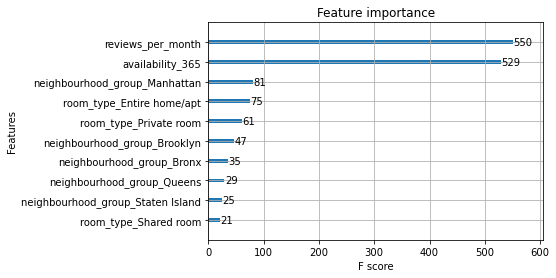

In [81]:
from xgboost import plot_importance, plot_tree
plot_importance(loaded_model,ax=plt.gca())

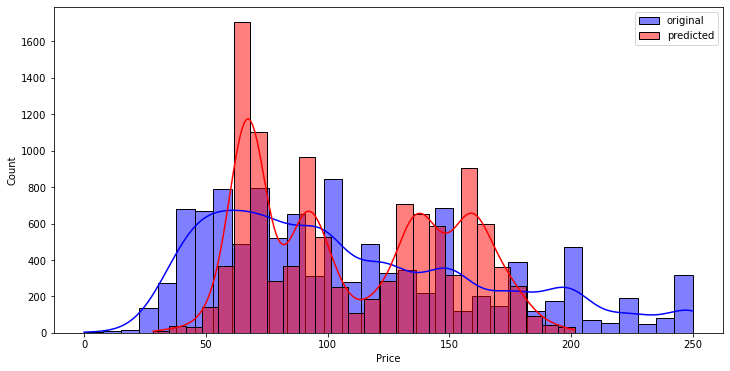

In [82]:
fig1 = plt.figure(figsize=(12, 6))

sns.histplot( y_test, color="blue", label="original", kde= True)
sns.histplot(y_test_pred, color="red", label="predicted", kde=True)

plt.xlabel("Price")
plt.legend()



In [83]:
fig1.savefig('Graphs/XGBoost_Comparision.png')

In [84]:
y_train_pred = loaded_model.predict(dtrain)

test = pd.DataFrame({"test prediction": y_test_pred, "test": y_test})
train =pd.DataFrame({"train prediction": y_train_pred, "train": y_train})

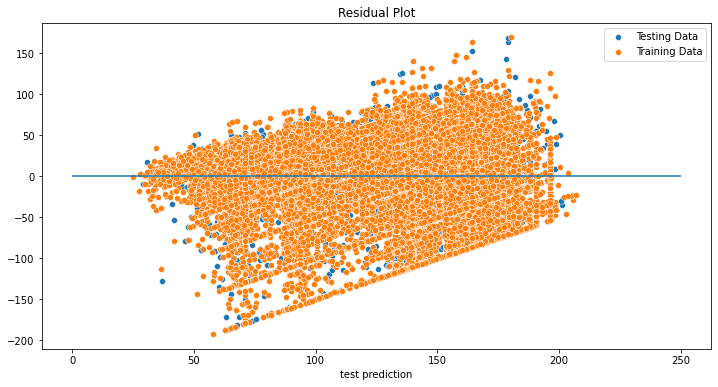

In [85]:
fig2 = plt.figure(figsize=(12, 6))

sns.scatterplot(data = test, x=test["test prediction"], y=test["test prediction"] - test["test"], label="Testing Data")
sns.scatterplot(data = train, x=train["train prediction"], y=train["train prediction"] - train["train"], label="Training Data")


#plt.legend()
plt.hlines(y=0, xmin=test["test"].min(), xmax=test["test"].max())

plt.title("Residual Plot")
plt.show()

In [77]:
fig2.savefig('Graphs/XGBoost_Comparision2.png')